In [1]:
import os
import pandas as pd
import numpy as np
import json
import folium

### Import Data
    

In [2]:
path = 'topojson/'

df_europe = pd.DataFrame.from_csv(path + 'tepsr_wc170(ok).tsv', sep="\t")
#df_europe = pd.DataFrame.from_csv(path + 'hrst_st_nuneage.tsv', sep="\t")
df_europe.head()

2005   2006   2007    2008    2009    2010   \
unit,sex,age,isced11,geo\time                                                 
PC,T,Y15-24,TOTAL,AT           11.0 b   9.8   9.4 b    8.5    10.7     9.5    
PC,T,Y15-24,TOTAL,BE           21.5 b  20.5   18.8    18.0    21.9    22.4    
PC,T,Y15-24,TOTAL,BG           22.3 b  19.5   15.1   12.7 b   16.2   21.9 b   
PC,T,Y15-24,TOTAL,CH            8.8 b   7.7    7.1     7.0     8.5    8.2 b   
PC,T,Y15-24,TOTAL,CY           13.9 b  10.0   10.2     9.0   13.8 b   16.6    

                                2011   2012   2013   2014   2015   2016   
unit,sex,age,isced11,geo\time                                             
PC,T,Y15-24,TOTAL,AT             8.9    9.4     9.7  10.3   10.6   11.2   
PC,T,Y15-24,TOTAL,BE           18.7 b  19.8    23.7  23.2   22.1   20.1   
PC,T,Y15-24,TOTAL,BG           25.0 b  28.1    28.4  23.8   21.6   17.2   
PC,T,Y15-24,TOTAL,CH             7.7    8.3     8.7   8.6    8.8    8.6   
PC,T,Y15-24,TOTAL,CY            22.4   27.7    38.9  36.0   32.8   29.1

### Clean Data

Some function to clean the data

In [3]:
#This function word_list match the words
def test_word(words, word_list):
    for idx in range(len(word_list)):
        if(word_list[idx] != words[idx]):
            return False
    return True

# This function return the new indices from a word list given (to keep only a part of the DF)
def new_idx(index, word_list, split_on):
    new_index = []
    for idx, val in enumerate(index):
        words = val.split(split_on)
        
        if(test_word(words, word_list)):
            new_index.append(val)
    
    return new_index

# method to keep the clean values because in DF the values are sometimes in str sometimes in float. 
# Futhermore, the str values are like "21.1 b" so we need to keep only the numerical value and delete the other part
def keep_only_values(value):
    new_value = value.copy()
    for i in range(len(value)):
        if(type(value[i]) == str):
            words = value[i].split(" ")
            new_value[i] = words[0]
    return new_value

In [4]:
#Here we just clean the DF some columns were like "2016 " and we didn't wanted the space and the we clean the values
df_europe_clean = df_europe.copy()
df_europe_clean.columns = [x.strip().replace(' ', '') for x in df_europe_clean.columns]
df_europe_clean = df_europe_clean.apply(keep_only_values).apply(pd.to_numeric, errors = 'coerce').fillna(value=0)

In [5]:
df_europe_clean.head()

2005  2006  2007  2008  2009  2010  2011  2012  \
unit,sex,age,isced11,geo\time                                                   
PC,T,Y15-24,TOTAL,AT           11.0   9.8   9.4   8.5  10.7   9.5   8.9   9.4   
PC,T,Y15-24,TOTAL,BE           21.5  20.5  18.8  18.0  21.9  22.4  18.7  19.8   
PC,T,Y15-24,TOTAL,BG           22.3  19.5  15.1  12.7  16.2  21.9  25.0  28.1   
PC,T,Y15-24,TOTAL,CH            8.8   7.7   7.1   7.0   8.5   8.2   7.7   8.3   
PC,T,Y15-24,TOTAL,CY           13.9  10.0  10.2   9.0  13.8  16.6  22.4  27.7   

                               2013  2014  2015  2016  
unit,sex,age,isced11,geo\time                          
PC,T,Y15-24,TOTAL,AT            9.7  10.3  10.6  11.2  
PC,T,Y15-24,TOTAL,BE           23.7  23.2  22.1  20.1  
PC,T,Y15-24,TOTAL,BG           28.4  23.8  21.6  17.2  
PC,T,Y15-24,TOTAL,CH            8.7   8.6   8.8   8.6  
PC,T,Y15-24,TOTAL,CY           38.9  36.0  32.8  29.1

In [6]:
# Here we select a part of the data to see the values
new_df_europe = df_europe_clean.copy()
#word_list = ['RT_UNE','HRSTU','Y15-74']
word_list = ['PC','T','Y15-74','TOTAL']
new_index = new_idx(new_df_europe.index.values, word_list, ',')

new_df_europe = new_df_europe.loc[new_index]
new_df_europe.head()

2005  2006  2007  2008  2009  2010  2011  2012  \
unit,sex,age,isced11,geo\time                                                   
PC,T,Y15-74,TOTAL,AT            5.6   5.3   4.9   4.1   5.3   4.8   4.6   4.9   
PC,T,Y15-74,TOTAL,BE            8.5   8.3   7.5   7.0   7.9   8.3   7.2   7.6   
PC,T,Y15-74,TOTAL,BG           10.1   9.0   6.9   5.6   6.8  10.3  11.3  12.3   
PC,T,Y15-74,TOTAL,CH            4.5   4.0   3.7   3.4   4.1   4.8   4.4   4.5   
PC,T,Y15-74,TOTAL,CY            5.3   4.6   3.9   3.7   5.4   6.3   7.9  11.9   

                               2013  2014  2015  2016  
unit,sex,age,isced11,geo\time                          
PC,T,Y15-74,TOTAL,AT            5.4   5.6   5.7   6.0  
PC,T,Y15-74,TOTAL,BE            8.4   8.5   8.5   7.8  
PC,T,Y15-74,TOTAL,BG           13.0  11.4   9.2   7.6  
PC,T,Y15-74,TOTAL,CH            4.8   4.9   4.8   5.0  
PC,T,Y15-74,TOTAL,CY           15.9  16.1  15.0  13.0

exctraction of some columns

In [7]:
# Function to rename the index (keep only the country code)
def rename_index(df):
    new_df = df.copy()
    
    indexes = new_df.index.values
    
    for words in indexes:
        words_list = words.split(',')
        new_df = new_df.rename(index={words: words_list[len(words_list)-1]})
    
    new_df.index.names = ['Country']
    return new_df

In [8]:
# We clean the indexes
new_df_clean_europe = rename_index(new_df_europe)
#list(new_df_clean)
new_df_clean_europe.head()

2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Country                                                                     
AT        5.6   5.3   4.9   4.1   5.3   4.8   4.6   4.9   5.4   5.6   5.7   
BE        8.5   8.3   7.5   7.0   7.9   8.3   7.2   7.6   8.4   8.5   8.5   
BG       10.1   9.0   6.9   5.6   6.8  10.3  11.3  12.3  13.0  11.4   9.2   
CH        4.5   4.0   3.7   3.4   4.1   4.8   4.4   4.5   4.8   4.9   4.8   
CY        5.3   4.6   3.9   3.7   5.4   6.3   7.9  11.9  15.9  16.1  15.0   

         2016  
Country        
AT        6.0  
BE        7.8  
BG        7.6  
CH        5.0  
CY       13.0

Take only the 2016 to try

In [9]:
#We take just the part of 2016
new_df_europe_2016 = new_df_clean_europe['2016']
new_df_europe_2016.head()

Country
AT     6.0
BE     7.8
BG     7.6
CH     5.0
CY    13.0
Name: 2016, dtype: float64

Now we will import the map and then apply the the data of the year 2016 to see how it works

In [10]:
state_geo_path = r'topojson/europe.geojson'
geo_json_data = json.load(open(state_geo_path))

In [11]:
m_europe = folium.Map([55,20], tiles='cartodbpositron', zoom_start=4)
folium.GeoJson(geo_json_data).add_to(m_europe)
m_europe

In [12]:
# This are the country-code that we have on our data
new_df_europe_2016.index.values

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA18', 'EA19',
       'EE', 'EL', 'ES', 'EU27', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

We can see that we don't have all the countries. However in the database we didn't find good ratio for the missing countries so we keeped only the countries that we already have

We can see that the name of the country are one time in French and in English. So we need to merge them better
So for this we will import an other data and compare the code and the name of the countries. The file cannot be read with panda so we need to import it with csv and keep it on a list

In [13]:
# We have our "translator" in a DF
list_country = pd.read_excel(path + 'countries_code.xlsx', index_col=None, header=0)
list_country.columns = ["Code","English_Name", "French_Name"]
list_country_Engl_Name = list_country.set_index("English_Name")
list_country_Engl_Name.head()

Code          French_Name
English_Name                                  
Andorra                AD              Andorre
United Arab Emirates   AE  Émirats arabes unis
Afghanistan            AF          Afghanistan
Antigua and Barbuda    AG   Antigua-et-Barbuda
Anguilla               AI             Anguilla

We can see that the country code is at the third position and the name at the fifth position

In [14]:
list_country_Engl_Name.index.values
list_country_Engl_Name.loc["Andorra"].Code

'AD'

In [15]:
#This function find the country code form a country name (find the match with the list_country)
def find_country_code(country_name):
    index_country = list_country_Engl_Name.index.values
    for country in index_country:
        if(country == country_name):
            return list_country_Engl_Name.loc[country_name].Code
    
    return country_name

In [16]:
# A function to define the color based on country_name 
def europe_unemployement_colors(country_name):
    country_key = find_country_code(country_name)
    key = new_df_europe_2016.index.values
    # here we use the code so no problem 
    if country_key in key:
        #print(country_key) # now 32
        unemployement = new_df_europe_2016[country_key]
        if unemployement > 9:
            return '#ff0000' # red
        else:
            return '#0000ff' # blue
    else:
        #print(country_name)
        '#000000'

In [59]:
europe_map_colored = folium.Map([55,20], tiles='cartodbpositron', zoom_start=3)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': europe_unemployement_colors(feature['properties']['NAME']),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5',
        }
    ).add_to(europe_map_colored)

europe_map_colored

Now that we have the map we can save it in a html file


In [18]:
def save_map(df_map,folder, name_file):
    saving_path = "maps/" + folder + "/"
    finale_name_file = name_file + ".html"
    df_map.save(saving_path + finale_name_file)

In [19]:
save_map(europe_map_colored,"01_map_colored", "europe_map_colored")

Now that we now how everything work, we can create the choropleth Map. For that, we need to improve the dataframe so instead of having the name as index, we will put the name of the country and it will be more easier for matching 

In [20]:
# We will see with the country code if it works better
def find_country_code(country_name):
    index_country = list_country.index.values
    for country in index_country:
        if(country == country_name):
            return list_country.loc[country_name].Code
    
    return country_name

# To change the index from country code to country key
def create_country_name(df):
    new_df = df.copy()
    index_df = new_df.index.values 
    
    list_code = list_country.set_index('Code')
    index_list_code = list_code.index.values
    
    for country_code in index_df:
        for list_country_code in index_list_code:
            if (country_code == list_country_code):
                new_df = new_df.rename(index={country_code: list_code.loc[country_code].English_Name})
                
    return new_df

In [21]:
new_df2_clean_europe = create_country_name(new_df_clean_europe)

new_df2_europe_2016 = new_df2_clean_europe['2016']
new_df2_europe_2016.head()

Country
Austria         6.0
Belgium         7.8
Bulgaria        7.6
Switzerland     5.0
Cyprus         13.0
Name: 2016, dtype: float64

Here we can see the choropleth map based on the country_code

In [22]:
#a function to plot a choropleth map
def create_choropleth(loc, key, dataframe,color):
    new_map = folium.Map(location=[55, 20],tiles='cartodbpositron', zoom_start=3)
    new_map.choropleth(geo_data=geo_json_data, data=dataframe,
             #columns=['State', 'Percentage'],
             key_on=key,
             fill_color=color, fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of Unemployement (%)')
    return new_map

First we will see the colorplet based on country code (feature.properties.FIPS)

In [23]:
europe_map = create_choropleth([55, 20], 'feature.properties.FIPS', new_df_europe_2016, 'BuPu')
europe_map

In [24]:
save_map(europe_map,"02_map_BuPu","europe_map_BuPu")

Here we can see the choropleth map based on the country_name (feature.properties.NAME) which is really better

In [25]:
europe_map2 = create_choropleth([55, 20], 'feature.properties.NAME', new_df2_europe_2016, 'YlOrRd')
europe_map2

In [26]:
save_map(europe_map2,"03_map_YlOrRd","europe_map_YlOrRd")

It can be interesting to interact with the data to see the evolution during years

In [27]:
import matplotlib.pyplot as plt

# a function to create a little widget based on the date so one can play with. 
def interaction(date):
    new_df_europe_year_x = new_df2_clean_europe[date]
    europe_map_inter = create_choropleth([55, 20], 'feature.properties.NAME', new_df_europe_year_x, 'YlOrRd')
    # we already save them everytime to have them on html if you want to save one again uncomment the next line
    #save_map(europe_map_inter,"04_map_year", "europe_map_YlOrRd_" + str(date))
    return europe_map_inter

In [28]:
from ipywidgets import interact
dates = new_df_clean_europe.columns.values
interact(interaction, date = list(dates));

The countries in Yellow are the countries where we don't have value for the selected year

Now we can look at all other intervals of age for example from 20 years old to 64 years old or an other one. Do do this we will create all the datafram from our data and interract with them

In [29]:
# a function that create datafram based on a word_list 
def create_df_interact(word_list):
    
    new_df_f_europe = df_europe_clean.copy()
    new_index = new_idx(new_df_f_europe.index.values, word_list, ',')
    new_df_f_europe = new_df_f_europe.loc[new_index]
    new_df_f_europe = rename_index(new_df_f_europe)
    return create_country_name(new_df_f_europe)

In [30]:
europe_Y15_24 = create_df_interact(['PC','T','Y15-24','TOTAL'])
europe_Y15_74 = create_df_interact(['PC','T','Y15-74','TOTAL'])
europe_Y20_64 = create_df_interact(['PC','T','Y20-64','TOTAL'])
europe_Y25_29 = create_df_interact(['PC','T','Y25-29','TOTAL'])
europe_Y25_54 = create_df_interact(['PC','T','Y25-54','TOTAL'])
europe_Y55_64 = create_df_interact(['PC','T','Y55-64','TOTAL'])
europe_Y55_64.head()

2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Country                                                                         
Austria       4.0   4.0   3.4   2.2   2.7   2.5   3.6   3.4   3.8   3.8   4.7   
Belgium       4.4   4.8   4.2   4.4   5.1   4.6   4.0   4.5   5.4   5.4   5.6   
Bulgaria      8.6   7.9   6.8   5.5   6.3   9.0   8.8  10.4  12.4  11.7   8.7   
Switzerland   3.7   3.1   3.1   2.6   2.7   3.5   3.5   3.4   3.3   3.3   4.0   
Cyprus        3.5   3.3   3.1   3.2   4.3   4.7   4.9   9.7  12.4  16.3  15.6   

             2016  
Country            
Austria       5.0  
Belgium       5.7  
Bulgaria      7.3  
Switzerland   3.8  
Cyprus       11.5

In [31]:
# to find the correct dataframe to use
def find_correct_data(date, data):
    if(data == 'Y15_24'):
        return europe_Y15_24[date]
    elif(data == 'Y15_74'):
        return europe_Y15_74[date]
    elif(data == 'Y20_64'):
        return europe_Y20_64[date]
    elif(data == 'Y25_29'):
        return europe_Y25_29[date]
    elif(data == 'Y25_54'):
        return europe_Y25_54[date]
    else:
        return europe_Y55_64[date]

In [32]:
def interaction_with_age(date, data):
    new_df_europe_year_x = find_correct_data(date, data)
    europe_map_inter = create_choropleth([55, 20], 'feature.properties.NAME', new_df_europe_year_x, 'YlOrRd')
    # we already save them everytime to have them on html if you want to save one again uncomment the next line (like before)
    #save_map(europe_map_inter,"05_map_year_and_age", "europe_map_YlOrRd_" + str(date) + "_" + str(data))
    return europe_map_inter

In [33]:
dates = new_df_clean_europe.columns.values
list_data = ['Y15_24', 'Y15_74','Y20_64', 'Y25_29','Y25_54', 'Y55_64']
interact(interaction_with_age, date = list(dates), data=list_data);

We add an other representation with bar chart the evolution of each country per years with the correct values

In [34]:
import seaborn
# to plot a datafram with many colors
def plot_df(df, title):
    seaborn.set_palette("Set1")
    #seaborn.set_palette("muted")
    seaborn.set_context("notebook")
    figure, axes = plt.subplots(1, 1, figsize=(16,8))
    result = seaborn.barplot(df.index, df, ax=axes)
    result.set_xticklabels(df.index, rotation=90)
    result.set_title(title, fontsize=14, fontweight="bold")
    
    return result

def interaction_date_bar(date, data):
    %matplotlib inline
    new_df_europe_year_x = find_correct_data(date, data)
    return plot_df(new_df_europe_year_x, data)

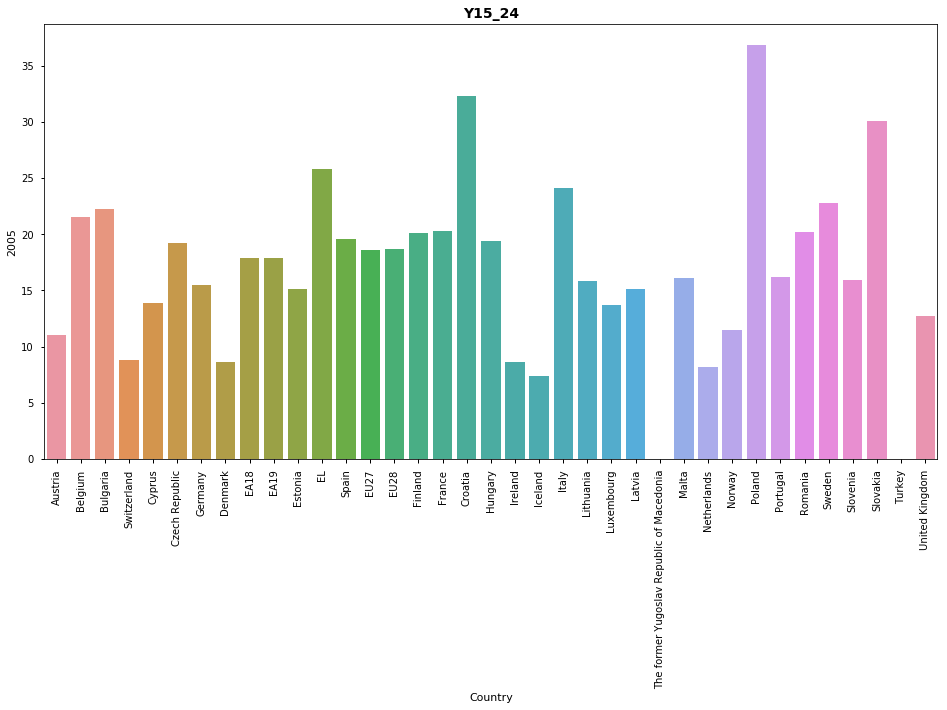

In [35]:
dates = new_df_clean_europe.columns.values
list_data = ['Y15_24', 'Y15_74','Y20_64', 'Y25_29','Y25_54', 'Y55_64']
interact(interaction_date_bar, date = list(dates), data=list_data);

Now we will do by country to see the evolution per year

In [36]:
# a little bit like before but here we base the result on column so need to loc
def find_correct_country(country, data):
    if(data == 'Y15_24'):
        return europe_Y15_24.loc[[country]]
    elif(data == 'Y15_74'):
        return europe_Y15_74.loc[[country]]
    elif(data == 'Y20_64'):
        return europe_Y20_64.loc[[country]]
    elif(data == 'Y25_29'):
        return europe_Y25_29.loc[[country]]
    elif(data == 'Y25_54'):
        return europe_Y25_54.loc[[country]]
    else:
        return europe_Y55_64.loc[[country]]

In [37]:
import matplotlib as mpl
def interaction_country_bar(country, data):
    %matplotlib inline
    new_df_europe_country_x = find_correct_country(country, data)
    new_df_europe_country_x = new_df_europe_country_x.transpose()
    mpl.style.use('default')
    return new_df_europe_country_x.plot(kind = 'bar', title =country, figsize=(20,10));

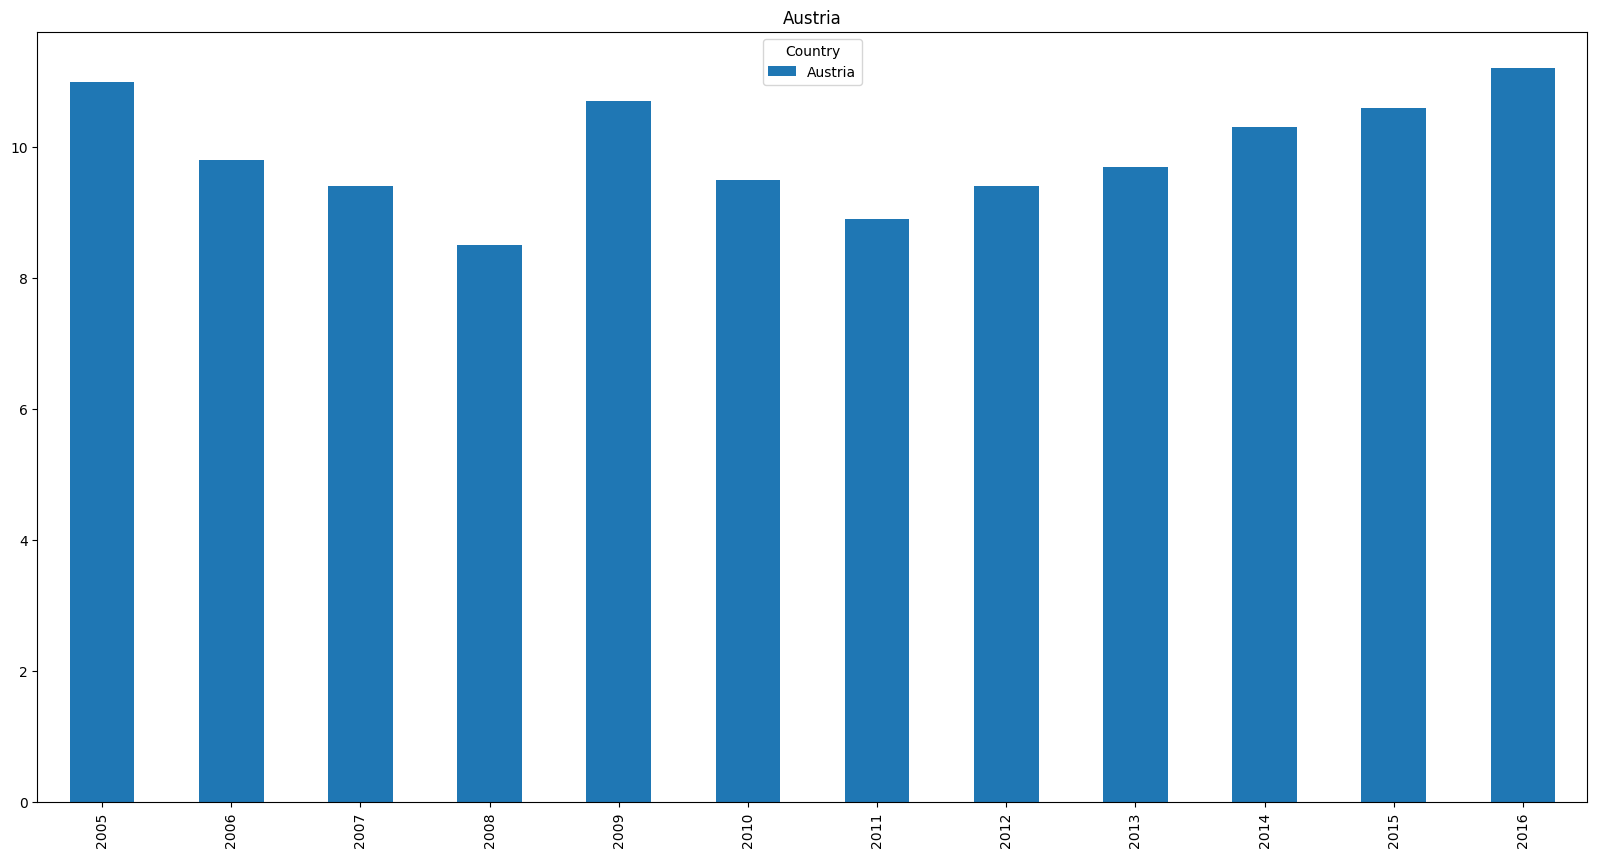

In [38]:
countries = europe_Y15_24.index.values
list_data = ['Y15_24', 'Y15_74','Y20_64', 'Y25_29','Y25_54', 'Y55_64']
interact(interaction_country_bar, country = list(countries), data=list_data);

Compare Switzerland's unemployment rate to that of the rest of Europe: The Swiss unemployment is always very low  compared to a large part of the others countries.We can see that today there are not many countries that have such a small ratio like Switzerland. We think that there are many reasons behind it. For example, in Switzerland, unemployment benefits are of shorter duration time so one needs to find quickly a job. There is no minimum salary and  the country's economy is more liberal and better than in other so-called rich countries. Theses reasons (there are others reasons too) can explain why we have a low ratio of unemployment and this a good adventage compared to the others countries.

We choose these colors for the map because we think that it represent the best the unemployment. When a country has a big ratio of unemployment it should be in red because that means that many people don't have a job and the country be worry about this. This is why we choose these colors because unemployment is a important thing and in red it catches our eye on the countries with big ratio. 

We also choose the bar chart interaction reprensentation so one can play with the boxes to see the differencies between the country each year. It's easier to understand in this format because in the map we don't see always the differencies with some colors. So it's harder to really understand the exact value but with a bar chart it's easier and that's why we add this plot. A question might be why we don't keep the same colors? The reason is simple because here we want to see the différent values between the countries, so it's better to represent them with other colors so we don't misunderstand the values between the countries. 

Finally for the last bar chart, we did it in a normal way with simple color because it shows better the evolution of the unemployment by country. We don't need multiple colors for this representation because it's all in one country and to be consistant with what we did before we keep one color (you can see above that the countries are represented by each time a different color).

## 2. Switzerland unemployment numbers ##

In [276]:
swiss_coords = [46.9167, 8.2667]
swiss_zoom = 8
geo_swiss_path = r'topojson/ch-cantons.topojson.json'

Going to https://www.amstat.ch/v2/index.jsp?lang=fr and then clicking on details, we were able to get the umemployment data for switzerland in a xlsx format

In [39]:
unemployment_switzerland = pd.read_excel(path + '2_1 Taux de chômageA.xlsx', index_col=None, header=0)
cantons_code = pd.read_excel(path + 'cantons_codes.xlsx', index_col=None, header=0)

In [40]:
unemployment_switzerland.head()

Canton     Janvier 2006     Février 2006        Mars 2006  \
0      NaN  Taux de chômage  Taux de chômage  Taux de chômage   
1   Zurich                4              3.9              3.7   
2    Berne                3              2.9              2.8   
3  Lucerne              3.2              3.2                3   
4      Uri              1.3              1.2              1.3   

        Avril 2006         Mai 2006        Juin 2006     Juillet 2006  \
0  Taux de chômage  Taux de chômage  Taux de chômage  Taux de chômage   
1              3.5              3.3              3.2              3.1   
2              2.6              2.4              2.2              2.2   
3              2.8              2.6              2.5              2.5   
4              1.2                1              0.8              0.7   

         Août 2006   Septembre 2006       ...                Mai 2016  \
0  Taux de chômage  Taux de chômage       ...         Taux de chômage   
1              3.1              3.1       ...                     3.6   
2              2.2              2.3       ...                     2.6   
3              2.5              2.5       ...                       2   
4              0.9              1.1       ...                       1   

         Juin 2016     Juillet 2016        Août 2016   Septembre 2016  \
0  Taux de chômage  Taux de chômage  Taux de chômage  Taux de chômage   
1              3.5              3.5              3.5              3.6   
2              2.5              2.5              2.6              2.6   
3              1.9              1.9                2              1.9   
4              0.7              0.7              0.9              0.9   

      Octobre 2016    Novembre 2016    Décembre 2016     Janvier 2017  \
0  Taux de chômage  Taux de chômage  Taux de chômage  Taux de chômage   
1              3.6              3.7              3.8              3.9   
2              2.6              2.8                3                3   
3              1.9                2              2.2              2.2   
4                1              1.1              1.3              1.5   

             Total  
0  Taux de chômage  
1              3.2  
2              2.3  
3              2.1  
4              1.1  

[5 rows x 135 columns]

we don't need all those column in fact we only need the even ones

In [41]:
df_ch = unemployment_switzerland.loc[1:, :]
df_ch.head()

Canton Janvier 2006 Février 2006 Mars 2006 Avril 2006 Mai 2006 Juin 2006  \
1   Zurich            4          3.9       3.7        3.5      3.3       3.2   
2    Berne            3          2.9       2.8        2.6      2.4       2.2   
3  Lucerne          3.2          3.2         3        2.8      2.6       2.5   
4      Uri          1.3          1.2       1.3        1.2        1       0.8   
5   Schwyz          2.4          2.4       2.2          2      1.9       1.7   

  Juillet 2006 Août 2006 Septembre 2006  ...  Mai 2016 Juin 2016 Juillet 2016  \
1          3.1       3.1            3.1  ...       3.6       3.5          3.5   
2          2.2       2.2            2.3  ...       2.6       2.5          2.5   
3          2.5       2.5            2.5  ...         2       1.9          1.9   
4          0.7       0.9            1.1  ...         1       0.7          0.7   
5          1.8       1.9            1.8  ...       1.7       1.6          1.6   

  Août 2016 Septembre 2016 Octobre 2016 Novembre 2016 Décembre 2016  \
1       3.5            3.6          3.6           3.7           3.8   
2       2.6            2.6          2.6           2.8             3   
3         2            1.9          1.9             2           2.2   
4       0.9            0.9            1           1.1           1.3   
5       1.6            1.6          1.7           1.8           1.9   

  Janvier 2017 Total  
1          3.9   3.2  
2            3   2.3  
3          2.2   2.1  
4          1.5   1.1  
5            2   1.6  

[5 rows x 135 columns]

In [42]:
df_ch = df_ch.set_index("Canton")
df_ch = df_ch.apply(pd.to_numeric, errors='coerce', axis=1)

In [69]:
df_ch.head()

Canton  Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
0   Zurich           4.0           3.9        3.7         3.5       3.3   
1    Berne           3.0           2.9        2.8         2.6       2.4   
2  Lucerne           3.2           3.2        3.0         2.8       2.6   
3      Uri           1.3           1.2        1.3         1.2       1.0   
4   Schwyz           2.4           2.4        2.2         2.0       1.9   

   Juin 2006  Juillet 2006  Août 2006  Septembre 2006  ...   Juin 2016  \
0        3.2           3.1        3.1             3.1  ...         3.5   
1        2.2           2.2        2.2             2.3  ...         2.5   
2        2.5           2.5        2.5             2.5  ...         1.9   
3        0.8           0.7        0.9             1.1  ...         0.7   
4        1.7           1.8        1.9             1.8  ...         1.6   

   Juillet 2016  Août 2016  Septembre 2016  Octobre 2016  Novembre 2016  \
0           3.5        3.5             3.6           3.6            3.7   
1           2.5        2.6             2.6           2.6            2.8   
2           1.9        2.0             1.9           1.9            2.0   
3           0.7        0.9             0.9           1.0            1.1   
4           1.6        1.6             1.6           1.7            1.8   

   Décembre 2016  Janvier 2017  Total  Code  
0            3.8           3.9    3.2    ZH  
1            3.0           3.0    2.3    BE  
2            2.2           2.2    2.1    LU  
3            1.3           1.5    1.1    UR  
4            1.9           2.0    1.6    SZ  

[5 rows x 136 columns]

In [44]:
df_ch = df_ch.drop(['Total'])

In [45]:
df_ch.head()

Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
Canton                                                                 
Zurich            4.0           3.9        3.7         3.5       3.3   
Berne             3.0           2.9        2.8         2.6       2.4   
Lucerne           3.2           3.2        3.0         2.8       2.6   
Uri               1.3           1.2        1.3         1.2       1.0   
Schwyz            2.4           2.4        2.2         2.0       1.9   

         Juin 2006  Juillet 2006  Août 2006  Septembre 2006  Octobre 2006  \
Canton                                                                      
Zurich         3.2           3.1        3.1             3.1           3.0   
Berne          2.2           2.2        2.2             2.3           2.4   
Lucerne        2.5           2.5        2.5             2.5           2.5   
Uri            0.8           0.7        0.9             1.1           1.2   
Schwyz         1.7           1.8        1.9             1.8           1.9   

         ...    Mai 2016  Juin 2016  Juillet 2016  Août 2016  Septembre 2016  \
Canton   ...                                                                   
Zurich   ...         3.6        3.5           3.5        3.5             3.6   
Berne    ...         2.6        2.5           2.5        2.6             2.6   
Lucerne  ...         2.0        1.9           1.9        2.0             1.9   
Uri      ...         1.0        0.7           0.7        0.9             0.9   
Schwyz   ...         1.7        1.6           1.6        1.6             1.6   

         Octobre 2016  Novembre 2016  Décembre 2016  Janvier 2017  Total  
Canton                                                                    
Zurich            3.6            3.7            3.8           3.9    3.2  
Berne             2.6            2.8            3.0           3.0    2.3  
Lucerne           1.9            2.0            2.2           2.2    2.1  
Uri               1.0            1.1            1.3           1.5    1.1  
Schwyz            1.7            1.8            1.9           2.0    1.6  

[5 rows x 134 columns]

In [167]:
cantons_code.head()

Code   Canton
0   ZH   Zurich
1   BE    Berne
2   LU  Lucerne
3   UR      Uri
4   SZ   Schwyz

In [47]:
df_ch = df_ch.reset_index()
df_ch = df_ch.merge(cantons_code,on="Canton")

In [48]:
df_ch.head()

Canton  Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
0   Zurich           4.0           3.9        3.7         3.5       3.3   
1    Berne           3.0           2.9        2.8         2.6       2.4   
2  Lucerne           3.2           3.2        3.0         2.8       2.6   
3      Uri           1.3           1.2        1.3         1.2       1.0   
4   Schwyz           2.4           2.4        2.2         2.0       1.9   

   Juin 2006  Juillet 2006  Août 2006  Septembre 2006  ...   Juin 2016  \
0        3.2           3.1        3.1             3.1  ...         3.5   
1        2.2           2.2        2.2             2.3  ...         2.5   
2        2.5           2.5        2.5             2.5  ...         1.9   
3        0.8           0.7        0.9             1.1  ...         0.7   
4        1.7           1.8        1.9             1.8  ...         1.6   

   Juillet 2016  Août 2016  Septembre 2016  Octobre 2016  Novembre 2016  \
0           3.5        3.5             3.6           3.6            3.7   
1           2.5        2.6             2.6           2.6            2.8   
2           1.9        2.0             1.9           1.9            2.0   
3           0.7        0.9             0.9           1.0            1.1   
4           1.6        1.6             1.6           1.7            1.8   

   Décembre 2016  Janvier 2017  Total  Code  
0            3.8           3.9    3.2    ZH  
1            3.0           3.0    2.3    BE  
2            2.2           2.2    2.1    LU  
3            1.3           1.5    1.1    UR  
4            1.9           2.0    1.6    SZ  

[5 rows x 136 columns]

In [275]:
geo_json_swiss = open(geo_swiss_path)
ch_map = folium.Map(swiss_coords, zoom_start=swiss_zoom)
ch_map.choropleth(geo_data=geo_json_swiss,topojson='objects.cantons', data=df_ch,
             columns=['Code', 'Janvier 2017'],
             key_on='id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of unemployed (%)')
ch_map

### 2)B)

In [50]:
unemployment_switzerland2 = pd.read_excel(path + '2_1 Taux de chômageB.xlsx',header=0)

In [51]:
unemployment_switzerland2.head()

Canton         Janvier 2006  \
0      NaN  Demandeurs d'emploi   
1   Zurich                38561   
2    Berne                22675   
3  Lucerne                 8863   
4      Uri                  421   

                                      Janvier 2006.1         Février 2006  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                276                37897   
2                                                518                22385   
3                                                113                 8731   
4                                                  1                  387   

                                      Février 2006.1            Mars 2006  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                264                37053   
2                                                485                21813   
3                                                101                 8480   
4                                                  1                  390   

                                         Mars 2006.1           Avril 2006  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                291                35279   
2                                                492                21043   
3                                                109                 8117   
4                                                  0                  364   

                                        Avril 2006.1             Mai 2006  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                273                34019   
2                                                461                19737   
3                                                112                 7760   
4                                                  0                  342   

                         ...                                 Octobre 2016  \
0                        ...                          Demandeurs d'emploi   
1                        ...                                        36691   
2                        ...                                        19836   
3                        ...                                         7246   
4                        ...                                          343   

                                      Octobre 2016.1        Novembre 2016  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                 93                37720   
2                                                121                20961   
3                                                217                 7549   
4                                                  3                  376   

                                     Novembre 2016.1        Décembre 2016  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                 95                38591   
2                                                122                21637   
3                                                254                 7871   
4                                                  8                  407   

                                     Décembre 2016.1         Janvier 2017  \
0  Demandeurs d'emploi non chômeurs - Reconversio...  Demandeurs d'emploi   
1                                                 77                39340   
2                                                 71                21586   
3                                                190                 7950   
4                                                  3                  464   

                                      Janvier 2017.1                Total  \
0  Demandeur

In [52]:
canton_names = unemployment_switzerland2.iloc[:,0]

In [53]:
df_not_unemployed = unemployment_switzerland2.iloc[:,::2]
df_not_unemployed = df_not_unemployed.drop([0])
df_not_unemployed= df_not_unemployed.set_index("Canton")
df_not_unemployed = df_not_unemployed.apply(pd.to_numeric, errors='coerce', axis=1)
df_not_unemployed = df_not_unemployed.rename(columns=lambda x: x.replace('.1',''))

In [68]:
df_not_unemployed.head()

Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
Canton                                                                 
Zurich            276           264        291         273       256   
Berne             518           485        492         461       428   
Lucerne           113           101        109         112       128   
Uri                 1             1          0           0         0   
Schwyz             41            45         35          33        33   

         Juin 2006  Juillet 2006  Août 2006  Septembre 2006  Octobre 2006  \
Canton                                                                      
Zurich         244           221        199             206           222   
Berne          376           306        355             359           369   
Lucerne        118            93         97              97            94   
Uri              0             0          0               0             0   
Schwyz          32            36         27              30            26   

         ...    Mai 2016  Juin 2016  Juillet 2016  Août 2016  Septembre 2016  \
Canton   ...                                                                   
Zurich   ...         120        113            86         90              89   
Berne    ...         137        120            98        106             113   
Lucerne  ...         267        250           208        232             231   
Uri      ...           1          1             2          1               1   
Schwyz   ...           3          3             0          0               2   

         Octobre 2016  Novembre 2016  Décembre 2016  Janvier 2017  Total  
Canton                                                                    
Zurich             93             95             77            93  20626  
Berne             121            122             71           121  33335  
Lucerne           217            254            190           271  20656  
Uri                 3              8              3            11    531  
Schwyz              3              4              1             2   1576  

[5 rows x 134 columns]

In [55]:
df_unemployed = unemployment_switzerland2.iloc[:,1::2]
df_unemployed = df_unemployed.apply(pd.to_numeric, errors='coerce', axis=1)
df_unemployed = df_unemployed.drop([0])
df_unemployed = df_unemployed.join(canton_names)
df_unemployed = df_unemployed.set_index("Canton")
df_unemployed.head()

Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
Canton                                                                 
Zurich        38561.0       37897.0    37053.0     35279.0   34019.0   
Berne         22675.0       22385.0    21813.0     21043.0   19737.0   
Lucerne        8863.0        8731.0     8480.0      8117.0    7760.0   
Uri             421.0         387.0      390.0       364.0     342.0   
Schwyz         2800.0        2702.0     2590.0      2473.0    2366.0   

         Juin 2006  Juillet 2006  Août 2006  Septembre 2006  Octobre 2006  \
Canton                                                                      
Zurich     32957.0       32288.0    31865.0         31336.0       31143.0   
Berne      18723.0       18345.0    18444.0         18678.0       19034.0   
Lucerne     7589.0        7542.0     7624.0          7527.0        7547.0   
Uri          321.0         323.0      347.0           369.0         391.0   
Schwyz      2249.0        2248.0     2251.0          2225.0        2257.0   

           ...      Mai 2016  Juin 2016  Juillet 2016  Août 2016  \
Canton     ...                                                     
Zurich     ...       36014.0    35474.0       35579.0    35790.0   
Berne      ...       19492.0    18883.0       18968.0    18986.0   
Lucerne    ...        7332.0     7148.0        7023.0     7125.0   
Uri        ...         344.0      306.0         283.0      313.0   
Schwyz     ...        2196.0     2128.0        2127.0     2153.0   

         Septembre 2016  Octobre 2016  Novembre 2016  Décembre 2016  \
Canton                                                                
Zurich          36233.0       36691.0        37720.0        38591.0   
Berne           19218.0       19836.0        20961.0        21637.0   
Lucerne          7126.0        7246.0         7549.0         7871.0   
Uri               332.0         343.0          376.0          407.0   
Schwyz           2182.0        2247.0         2375.0         2512.0   

         Janvier 2017      Total  
Canton                            
Zurich        39340.0  4175783.0  
Berne         21586.0  2403280.0  
Lucerne        7950.0   941797.0  
Uri             464.0    50143.0  
Schwyz         2581.0   282632.0  

[5 rows x 134 columns]

In [56]:
df_minus = df_unemployed.subtract(df_not_unemployed)
df_minus.head()

Janvier 2006  Février 2006  Mars 2006  Avril 2006  Mai 2006  \
Canton                                                                 
Zurich        38285.0       37633.0    36762.0     35006.0   33763.0   
Berne         22157.0       21900.0    21321.0     20582.0   19309.0   
Lucerne        8750.0        8630.0     8371.0      8005.0    7632.0   
Uri             420.0         386.0      390.0       364.0     342.0   
Schwyz         2759.0        2657.0     2555.0      2440.0    2333.0   

         Juin 2006  Juillet 2006  Août 2006  Septembre 2006  Octobre 2006  \
Canton                                                                      
Zurich     32713.0       32067.0    31666.0         31130.0       30921.0   
Berne      18347.0       18039.0    18089.0         18319.0       18665.0   
Lucerne     7471.0        7449.0     7527.0          7430.0        7453.0   
Uri          321.0         323.0      347.0           369.0         391.0   
Schwyz      2217.0        2212.0     2224.0          2195.0        2231.0   

           ...      Mai 2016  Juin 2016  Juillet 2016  Août 2016  \
Canton     ...                                                     
Zurich     ...       35894.0    35361.0       35493.0    35700.0   
Berne      ...       19355.0    18763.0       18870.0    18880.0   
Lucerne    ...        7065.0     6898.0        6815.0     6893.0   
Uri        ...         343.0      305.0         281.0      312.0   
Schwyz     ...        2193.0     2125.0        2127.0     2153.0   

         Septembre 2016  Octobre 2016  Novembre 2016  Décembre 2016  \
Canton                                                                
Zurich          36144.0       36598.0        37625.0        38514.0   
Berne           19105.0       19715.0        20839.0        21566.0   
Lucerne          6895.0        7029.0         7295.0         7681.0   
Uri               331.0         340.0          368.0          404.0   
Schwyz           2180.0        2244.0         2371.0         2511.0   

         Janvier 2017      Total  
Canton                            
Zurich        39247.0  4155157.0  
Berne         21465.0  2369945.0  
Lucerne        7679.0   921141.0  
Uri             453.0    49612.0  
Schwyz         2579.0   281056.0  

[5 rows x 134 columns]

In [57]:
df_minus = df_minus.reset_index()
df_minus = df_minus.merge(cantons_code,on="Canton")

In [278]:
geo_json_swiss = open(geo_swiss_path)
ch_map2 = folium.Map(swiss_coords, zoom_start=swiss_zoom)
ch_map2.choropleth(geo_data=geo_json_swiss,topojson='objects.cantons', data=df_minus,
             columns=['Code', 'Janvier 2017'],
             key_on='id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of unemployed (%)')
ch_map2

### 3a Switzerland unemployement Swiss/Foreign workers

#### Directive
Use the [amstat](https://www.amstat.ch/v2/index.jsp) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.

The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for foreign (5.1%) and Swiss (2.2%) workers.

Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (hint The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

#### Decision and retrieve Data
In this exercise, we chose to plot the absolute (in the sense opposed to relative) difference of employment between Foreigners and Swiss per canton

From [amstat](https://www.amstat.ch/v2/index.jsp?lang=fr), click on details, go to unemployed, unemployed with different criteria, then select:
1. select month
2. registered unemployed (only)
3. nothing
4. Canton
5. Nationality
6. unbox all
7. unbox all
Now execute report, enter 201709 and export the file as xlsx. Now you have the source file

#### Task
Since we only have one month, we can drop the month column

In [84]:
foreigners_swiss = pd.read_excel(path + 'rate_swiss_foreigners.xlsx', index_col=None, header=1)
for_swi_df = foreigners_swiss.drop(0).drop('Mois', axis=1)

We reorganise data so that it makes more sense for what we want to do (plot employment difference per Canton

In [195]:
for_swi_idxd = for_swi_df.set_index(['Canton', 'Nationalité'])
forswi_clean = for_swi_idxd.unstack(level = 1)['Septembre 2017']
forswi_clean.columns = ['rem', 'Foreigners', 'Swiss', 'Total']
forswi_df = forswi_clean.drop('rem', axis=1).apply(pd.to_numeric, errors='coerce', axis=1)

In [202]:
forswi_df.head(3)

Foreigners   Swiss    Total
Canton                                                   
Appenzell Rhodes-Extérieures       179.0   344.0    523.0
Appenzell Rhodes-Intérieures        23.0    39.0     62.0
Argovie                           4972.0  5712.0  10684.0

We get the Canton Code to be able to plot on the map

In [269]:
forswi_merged = forswi_df.reset_index().merge(cantons_code,on='Canton')
forswi_merged.head(3)

Canton  Foreigners   Swiss    Total Code
0  Appenzell Rhodes-Extérieures       179.0   344.0    523.0   AR
1  Appenzell Rhodes-Intérieures        23.0    39.0     62.0   AI
2                       Argovie      4972.0  5712.0  10684.0   AG

Now we calculate the diff, since it is the value we want to display on the map

In [200]:
forswi_diff = forswi_merged.copy()
forswi_diff['Diff'] = forswi_diff['Swiss'] - forswi_diff['Foreigners']
forswi_diff.head(3)

Canton  Foreigners   Swiss    Total Code   Diff
0  Appenzell Rhodes-Extérieures       179.0   344.0    523.0   AR  165.0
1  Appenzell Rhodes-Intérieures        23.0    39.0     62.0   AI   16.0
2                       Argovie      4972.0  5712.0  10684.0   AG  740.0

Now we can plot the difference on the map

In [272]:
geo_json_data2 = open(state_geo_path2)
diff_unemployed_map = folium.Map(swiss_coords, zoom_start=swiss_zoom)
diff_unemployed_map.choropleth(geo_data=geo_json_data2,topojson='objects.cantons', data=forswi_diff,
             columns=['Code', 'Diff'],
             key_on='id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Difference of employment Foreigners/Swiss')
diff_unemployed_map

### 3b Switzerland unemployement Swiss/Foreign workers by age group

#### Directive
Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.  


#### Decisions and retrieve Data
In this part, we decided to plot the absolute difference (in the same sense as in 3a) between Swiss and Foreigners by age category

From [amstat](https://www.amstat.ch/v2/index.jsp?lang=fr) again, click on details, go to unemployed, unemployed with different criteria, then select:
1. select month
2. registered unemployed (only)
3. nothing
4. Canton
5. Nationality and Age category 15-24, 25-49, 50 years and more
6. unbox all
7. unbox all
Now execute report, enter 201709 and export the file as xlsx. Now you have the source file

To keep names explicit, forswi (which stands for foreigner/swiss) will be shorten to fs

#### Task
Again, we focus on a single mont, so we can drop this column

In [211]:
foreigners_swiss_age = pd.read_excel(path + 'rate_swiss_foreigners_by_age.xlsx', index_col=None, header=1)
fs_age = foreigners_swiss_age.drop(0).drop('Mois', axis=1)

To calculate the difference, we need to have index as [Canton, Age] and columns as Nationality

In [232]:
fs_drop = fs_age.drop('Classes d\'âge 15-24, 25-49, 50 ans et plus', axis=1).dropna()
fs_drop.columns = ['Canton', 'Nationalité', 'Age', 'sept2017']
fs_idxd = fs_drop.set_index(['Canton', 'Age', 'Nationalité'])
fs_idxd.head(7)

sept2017
Canton Age            Nationalité         
Zurich 15-24 ans      Etrangers       1015
       25-49 ans      Etrangers       8846
       50 ans et plus Etrangers       2250
       15-24 ans      Suisses         2405
       25-49 ans      Suisses         8207
       50 ans et plus Suisses         4502
Berne  15-24 ans      Etrangers        597

We can now calculate the diff by unstacking and taking the difference of columns

In [239]:
fs_unstacked = fs_idxd.unstack(level=2)['sept2017']
fs_unstacked['Diff'] = fs_unstacked['Suisses'] - fs_unstacked['Etrangers']
fs_unstacked.head(2)

Nationalité                            Etrangers Suisses Diff
Canton                       Age                             
Appenzell Rhodes-Extérieures 15-24 ans        21      44   23
                             25-49 ans       108     151   43

Now that we have the correct values, we add the canton code. We don't want to display the fullname on our bar plot since it will already be crowded

In [241]:
fs_merged = fs_unstacked.reset_index().merge(cantons_code,on='Canton')
fs_merged.head(3)

Canton             Age Etrangers Suisses Diff Code
0  Appenzell Rhodes-Extérieures       15-24 ans        21      44   23   AR
1  Appenzell Rhodes-Extérieures       25-49 ans       108     151   43   AR
2  Appenzell Rhodes-Extérieures  50 ans et plus        50     149   99   AR

Since we are only interested in the diff by code and age, we will drop useless columns Etrangers, Suisses and Canton

In [250]:
fs_m_idxd = fs_merged.drop(['Etrangers', 'Suisses', 'Canton'], axis=1)
fs_clean = fs_m_idxd.set_index(['Code', 'Age'])
fs_clean.head(4)

Diff
Code Age                
AR   15-24 ans        23
     25-49 ans        43
     50 ans et plus   99
AI   15-24 ans         4

We only have left what we need, we can simply unstack again and plot

In [253]:
fs_u_final = fs_clean.unstack(level=1)
fs_u_final.head(2)

Diff                         
Age  15-24 ans 25-49 ans 50 ans et plus
Code                                   
AG         361      -478            857
AI           4         4              8

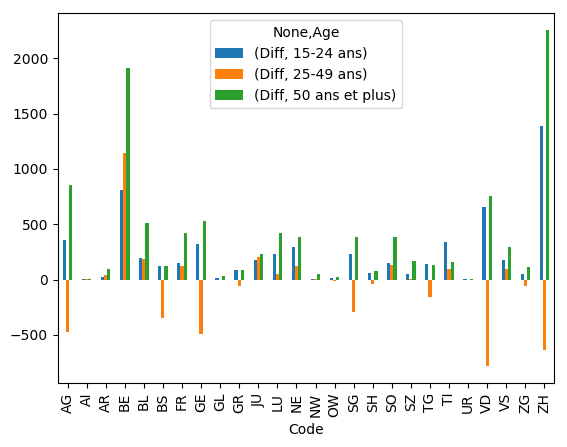

In [255]:
fs_u_final.plot(kind='bar');